In [10]:
# import MP4_code
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

sample_list = ['sample_hand.jpeg', 'sample_hand1.jpeg', 'sample_hand2.jpeg', 'sample_hand3.jpeg', 'sample_hand4.jpeg', 'sample_hand5.jpeg', 'sample_hand6.jpeg', 'sample_hand7.jpeg', 'sample_hand8.bmp', 'sample_hand9.bmp', 'sample_hand10.bmp']

# sample_list1 = ['sample_hand8.bmp', 'sample_hand9.bmp', 'sample_hand10.bmp']


In [5]:
def make_rgb_hist(list_of_images):
    skin_images = []
    for image in list_of_images:
        img_array = cv2.imread(image)
        skin_images.append(img_array)

    skin_hists = []
    for img in skin_images:
        blue, green, red = cv2.split(img)
        hist = cv2.calcHist([red, green], [0, 1], None, [32, 32],[0, 256, 0, 256])
        skin_hists.append(hist)

    combined_hist = skin_hists[0]
    for x in range(1, len(skin_hists)):
        combined_hist += skin_hists[x]
    
    return combined_hist

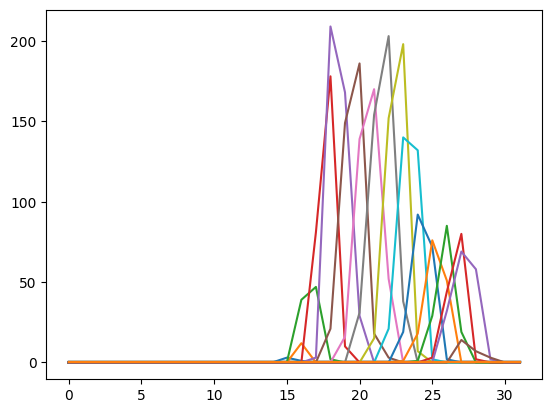

In [17]:
hist_combined = MP4_code.make_rgb_hist(sample_list)



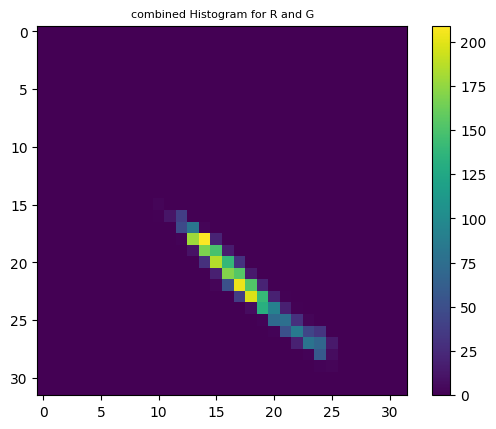

In [18]:
plt.subplot()
p = plt.imshow(hist_combined, interpolation="nearest")
plt.title("combined Histogram for R and G", fontsize=8)
plt.colorbar(p)

In [7]:
def make_hsi_hist(image_list):
    skin_images = []
    h_list = []
    s_list = []
    
    # Iterate over the list of images
    for image in image_list:
        # Load the image and convert to HSI color space
        img_array = cv2.imread(image)
        hsi = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV_FULL)
        
        # Iterate over each pixel in the image and append h and s values to the lists
        for i in range(img_array.shape[0]):
            for j in range(img_array.shape[1]):
                h_list.append(hsi[i,j, 0])
                s_list.append(hsi[i,j, 1])
    
    # Calculate the 2D histogram for H and S values with 10 bins
    hist_2d = cv2.calcHist([np.array(h_list), np.array(s_list)], [0, 1], None, [10, 10], [0, 180, 0, 256])

    hist_2d = hist_2d / np.sum(hist_2d)
    
    return hist_2d

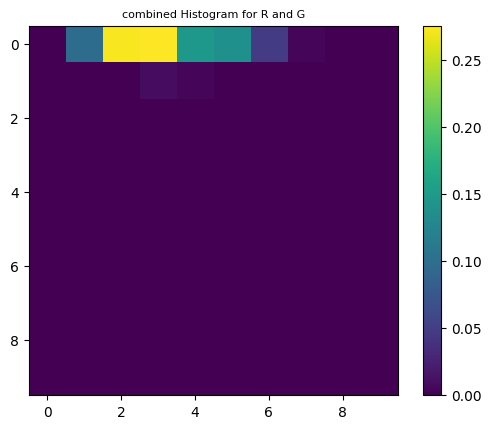

In [11]:
hist_combined_hsi = make_hsi_hist(sample_list)

# print(hist_combined_hsi)

plt.subplot()
p = plt.imshow(hist_combined_hsi, interpolation="nearest")
plt.title("combined Histogram for R and G", fontsize=8)
plt.colorbar(p)

In [97]:
print(hist_combined_hsi)

[[0.0000000e+00 9.7874820e-02 2.7304518e-01 2.7537662e-01 1.4670014e-01
  1.3871951e-01 4.9049497e-02 4.6180058e-03 2.2417503e-04 4.4835007e-05]
 [0.0000000e+00 4.9318507e-04 7.6219509e-04 9.0566715e-03 3.7661407e-03
  2.6901005e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 

In [12]:
def save_numpy_img(image_array, image_name):
    image = Image.fromarray(image_array)
    image.save(image_name)
    return 


In [13]:
def hsi_segment(hist, image_name):
    threshold = 2.6357407e-04
    img_array = cv2.imread(image_name)
    hsi = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV_FULL)
    h_norm = hsi[:,:,0] / 180
    s_norm = hsi[:,:,1] / 256


    # Iterate over histogram bins and calculate the threshold
    for i in range(len(hist[0])):
        for j in range(len(hist[1])):
            bin_val = hist[i][j]
            if bin_val > threshold:
                # Calculate lower and upper bounds for hue and saturation based on bin index
                h_low = i / 10
                h_high = (i + 1) / 10
                s_low = j / 10
                s_high = (j + 1) / 10

                # Create a binary mask for pixels within the current bin
                mask = np.logical_and(h_norm >= h_low, h_norm < h_high)
                mask = np.logical_and(mask, s_norm >= s_low)
                mask = np.logical_and(mask, s_norm < s_high)

                # Apply the mask to the original image to segment the desired region
                img_array[mask] = [0, 0, 255]  # Set the color of the segmented region to red

    return img_array
                

    

In [14]:
mask = hsi_segment(hist_combined_hsi, 'gun1.bmp')

save_numpy_img(mask, 'gun_mask.bmp')